# Part I - Loan Data From Prosper


## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data dictionary to understand the dataset's variables.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
df=pd.read_csv(r'C:\Users\joan\Downloads\prosperLoanData.csv')

In [5]:
# hoverview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


### Data Assessing

In [6]:
#Selecting relevant columns
data=df[['ListingNumber','Term','LoanStatus','ProsperRating (Alpha)','BorrowerAPR','BorrowerRate','ProsperScore',
         'ListingCategory (numeric)','Occupation','EmploymentStatusDuration','EmploymentStatus',
         'IsBorrowerHomeowner','IncomeRange','LoanOriginalAmount','LoanOriginationDate','BorrowerState','StatedMonthlyIncome']]

In [7]:

data.head(15)

,ListingNumber,Term,LoanStatus,ProsperRating (Alpha),BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatusDuration,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,LoanOriginationDate,BorrowerState,StatedMonthlyIncome
0,193129,36,Completed,NaN,0.16516,0.1580,NaN,0,Other,2.0,Self-employed,True,"$25,000-49,999",9425,2007-09-12 00:00:00,CO,3083.333333
1,1209647,36,Current,A,0.12016,0.0920,7.0,2,Professional,44.0,Employed,False,"$50,000-74,999",10000,2014-03-03 00:00:00,CO,6125.000000
2,81716,36,Completed,NaN,0.28269,0.2750,NaN,0,Other,NaN,Not available,False,Not displayed,3001,2007-01-17 00:00:00,GA,2083.333333
3,658116,36,Current,A,0.12528,0.0974,9.0,16,Skilled Labor,113.0,Employed,True,"$25,000-49,999",10000,2012-11-01 00:00:00,GA,2875.000000
4,909464,36,Current,D,0.24614,0.2085,4.0,2,Executive,44.0,Employed,True,"$100,000+",15000,2013-09-20 00:00:00,MN,9583.333333
5,1074836,60,Current,B,0.15425,0.1314,10.0,1,Professional,82.0,Employed,True,"$100,000+",15000,2013-12-24 00:00:00,NM,8333.333333
6,750899,36,Current,E,0.31032,0.2712,2.0,1,Sales - Retail,172.0,Employed,False,"$25,000-49,999",3000,2013-04-18 00:00:00,KS,2083.333333
7,768193,36,Current,C,0.23939,0.2019,4.0,2,Laborer,103.0,Employed,False,"$25,000-49,999",10000,2013-05-13 00:00:00,CA,3355.750000
8,1023355,36,Current,AA,0.07620,0.0629,9.0,7,Food Service,269.0,Employed,True,"$25,000-49,999",10000,2013-12-12 00:00:00,IL,3333.333333
9,1023355,36,Current,AA,0.07620,0.0629,11.0,7,Food Service,269.0,Employed,True,"$25,000-49,999",10000,2013-12-12 00:00:00,IL,3333.333333


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   Occupation                 110349 non-null  object 
 9   EmploymentStatusDuration   106312 non-null  float64
 10  EmploymentStatus           111682 non-null  object 
 11  IsBorrowerHomeowner        113937 non-null  bool   
 12  IncomeRange                113937 non-null  object 
 13  LoanOriginalAmount         11

In [7]:
data.shape

(113937, 17)

In [8]:
#Checking for % ratio of null values
data.isna().sum()*100/len(data)

ListingNumber                 0.000000
Term                          0.000000
LoanStatus                    0.000000
ProsperRating (Alpha)        25.526387
BorrowerAPR                   0.021942
BorrowerRate                  0.000000
ProsperScore                 25.526387
ListingCategory (numeric)     0.000000
Occupation                    3.149109
EmploymentStatusDuration      6.692295
EmploymentStatus              1.979164
IsBorrowerHomeowner           0.000000
IncomeRange                   0.000000
LoanOriginalAmount            0.000000
LoanOriginationDate           0.000000
BorrowerState                 4.840394
StatedMonthlyIncome           0.000000
dtype: float64

In [9]:
#Checking for duplicates values
data.duplicated().sum()

0

In [10]:
data['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [11]:
data['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [12]:
data['Term'].unique()

array([36, 60, 12], dtype=int64)

In [13]:
data['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [14]:
data['IsBorrowerHomeowner'].unique()

array([ True, False])

In [15]:
#Creating a copy
loan_df=data.copy()

### Data Cleaning

In [16]:
loan_df.head()

,ListingNumber,Term,LoanStatus,ProsperRating (Alpha),BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatusDuration,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,LoanOriginationDate,BorrowerState,StatedMonthlyIncome
0,193129,36,Completed,NaN,0.16516,0.1580,NaN,0,Other,2.0,Self-employed,True,"$25,000-49,999",9425,2007-09-12 00:00:00,CO,3083.333333
1,1209647,36,Current,A,0.12016,0.0920,7.0,2,Professional,44.0,Employed,False,"$50,000-74,999",10000,2014-03-03 00:00:00,CO,6125.000000
2,81716,36,Completed,NaN,0.28269,0.2750,NaN,0,Other,NaN,Not available,False,Not displayed,3001,2007-01-17 00:00:00,GA,2083.333333
3,658116,36,Current,A,0.12528,0.0974,9.0,16,Skilled Labor,113.0,Employed,True,"$25,000-49,999",10000,2012-11-01 00:00:00,GA,2875.000000
4,909464,36,Current,D,0.24614,0.2085,4.0,2,Executive,44.0,Employed,True,"$100,000+",15000,2013-09-20 00:00:00,MN,9583.333333


#### Dropping null values

In [17]:
loan_df.dropna(inplace=True)

In [18]:
#Checking if null values has been dropped
loan_df.isna().sum()

ListingNumber                0
Term                         0
LoanStatus                   0
ProsperRating (Alpha)        0
BorrowerAPR                  0
BorrowerRate                 0
ProsperScore                 0
ListingCategory (numeric)    0
Occupation                   0
EmploymentStatusDuration     0
EmploymentStatus             0
IsBorrowerHomeowner          0
IncomeRange                  0
LoanOriginalAmount           0
LoanOriginationDate          0
BorrowerState                0
StatedMonthlyIncome          0
dtype: int64

#### Renaming some columns

In [19]:
loan_df.rename({'ProsperRating (Alpha)':'ProsperRating','ListingCategory (numeric)': 'ListingCategory'},axis=1,inplace=True)

In [20]:
#Test
loan_df.columns

Index(['ListingNumber', 'Term', 'LoanStatus', 'ProsperRating', 'BorrowerAPR',
       'BorrowerRate', 'ProsperScore', 'ListingCategory', 'Occupation',
       'EmploymentStatusDuration', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'IncomeRange', 'LoanOriginalAmount', 'LoanOriginationDate',
       'BorrowerState', 'StatedMonthlyIncome'],
      dtype='object')

#### Convert some columns with incorrect datatype to correct data type

In [21]:
loan_df["LoanOriginationDate"] = loan_df["LoanOriginationDate"].astype('datetime64[ns]')

In [22]:
loan_df['LoanOriginationYear'] = loan_df['LoanOriginationDate'].dt.year
loan_df['LoanOriginationMonth']= loan_df['LoanOriginationDate'].dt.month

In [23]:
loan_df.ListingNumber = loan_df.ListingNumber.astype(str)

#### Renaming of row values in 'LoanOriginationMonth'

In [24]:
def months_name(LoanOriginationMonth):
    if LoanOriginationMonth==1:
        return 'Jan'
    elif LoanOriginationMonth==2:
        return 'Feb'
    elif LoanOriginationMonth==3:
        return 'Mar'
    elif LoanOriginationMonth==4:
        return 'Apr'
    elif LoanOriginationMonth==5:
        return 'May'
    elif LoanOriginationMonth==6:
        return 'Jun'
    elif LoanOriginationMonth==7:
        return 'Jul'
    elif LoanOriginationMonth==8:
        return 'Aug'
    elif LoanOriginationMonth==9:
        return 'Sep'
    elif LoanOriginationMonth==10:
        return 'Oct'
    elif LoanOriginationMonth==11:
        return 'Nov'
    
    else:
        return 'Dec'
loan_df['LoanMonth']= loan_df['LoanOriginationMonth'].apply(months_name)

In [25]:
#Test
loan_df['LoanMonth'].unique()

array(['Mar', 'Nov', 'Sep', 'Dec', 'Apr', 'May', 'Jan', 'Jul', 'Oct',
       'Feb', 'Jun', 'Aug'], dtype=object)

Converting categorical features to categorical data type

In [26]:
# convert IsBorrowerHomeowner,EmploymentStatus,LoanStatus,LoanMonth,ProsperRating,ProsperScore,LoanOriginationYear and IncomeRange into ordered categorical types
ordinal_var_dict = {'IsBorrowerHomeowner': [True, False],
                    'EmploymentStatus': ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
                                         'Not employed', 'Part-time', 'Retired'],
                    'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff', 
                              'Past Due (16-30 days)','Cancelled','Past Due (61-90 days)', 'Past Due (31-60 days)',
                              'Past Due (91-120 days)','FinalPaymentInProgress','Past Due (>120 days)'],
                    'LoanMonth': ['Mar', 'Nov', 'Sep', 'Dec', 'Apr', 'May', 'Jan', 'Jul', 'Oct','Feb', 'Jun', 'Aug'],
                    'ProsperRating': ['A', 'D', 'B', 'E', 'C', 'AA', 'HR'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'LoanOriginationYear': [2009, 2010, 2011, 2012, 2013, 2014],
                    'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

In [27]:
#Test
loan_df.dtypes

ListingNumber                       object
Term                                 int64
LoanStatus                        category
ProsperRating                     category
BorrowerAPR                        float64
BorrowerRate                       float64
ProsperScore                      category
ListingCategory                      int64
Occupation                          object
EmploymentStatusDuration           float64
EmploymentStatus                  category
IsBorrowerHomeowner               category
IncomeRange                       category
LoanOriginalAmount                   int64
LoanOriginationDate         datetime64[ns]
BorrowerState                       object
StatedMonthlyIncome                float64
LoanOriginationYear               category
LoanOriginationMonth                 int64
LoanMonth                         category
dtype: object

#### Dropping 'LoanOriginationDate' column

In [28]:
loan_df.drop(['LoanOriginationDate','LoanOriginationMonth'], axis=1,inplace=True)

In [29]:
#Test
loan_df.columns

Index(['ListingNumber', 'Term', 'LoanStatus', 'ProsperRating', 'BorrowerAPR',
       'BorrowerRate', 'ProsperScore', 'ListingCategory', 'Occupation',
       'EmploymentStatusDuration', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'IncomeRange', 'LoanOriginalAmount', 'BorrowerState',
       'StatedMonthlyIncome', 'LoanOriginationYear', 'LoanMonth'],
      dtype='object')

In [30]:
loan_df.dtypes

ListingNumber                 object
Term                           int64
LoanStatus                  category
ProsperRating               category
BorrowerAPR                  float64
BorrowerRate                 float64
ProsperScore                category
ListingCategory                int64
Occupation                    object
EmploymentStatusDuration     float64
EmploymentStatus            category
IsBorrowerHomeowner         category
IncomeRange                 category
LoanOriginalAmount             int64
BorrowerState                 object
StatedMonthlyIncome          float64
LoanOriginationYear         category
LoanMonth                   category
dtype: object

In [31]:
#Drop null values found in 
#Covert 'ListingNumber' to string
#Covert 'LoanOriginalDataState' from object to a date dtype
# Use split method to extract thendifferent category of student

In [31]:
# descriptive statistics for numeric variables
print(loan_df.describe())

               Term   BorrowerAPR  BorrowerRate  ListingCategory  \
count  83507.000000  83507.000000  83507.000000     83507.000000   
mean      42.515957      0.226860      0.196254         3.329098   
std       11.669560      0.080115      0.074807         4.374292   
min       12.000000      0.045830      0.040000         0.000000   
25%       36.000000      0.163280      0.135900         1.000000   
50%       36.000000      0.219450      0.187500         1.000000   
75%       60.000000      0.292540      0.257400         3.000000   
max       60.000000      0.423950      0.360000        20.000000   

       EmploymentStatusDuration  LoanOriginalAmount  StatedMonthlyIncome  
count              83507.000000        83507.000000         8.350700e+04  
mean                 103.344306         9104.256541         5.966762e+03  
std                   96.219084         6300.693843         8.297231e+03  
min                    0.000000         1000.000000         0.000000e+00  
25%         

In [32]:
loan_df.head()

,ListingNumber,Term,LoanStatus,ProsperRating,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory,Occupation,EmploymentStatusDuration,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,BorrowerState,StatedMonthlyIncome,LoanOriginationYear,LoanMonth
1,1209647,36,Current,A,0.12016,0.0920,7,2,Professional,44.0,Employed,False,"$50,000-74,999",10000,CO,6125.000000,2014,Mar
3,658116,36,Current,A,0.12528,0.0974,9,16,Skilled Labor,113.0,Employed,True,"$25,000-49,999",10000,GA,2875.000000,2012,Nov
4,909464,36,Current,D,0.24614,0.2085,4,2,Executive,44.0,Employed,True,"$100,000+",15000,MN,9583.333333,2013,Sep
5,1074836,60,Current,B,0.15425,0.1314,10,1,Professional,82.0,Employed,True,"$100,000+",15000,NM,8333.333333,2013,Dec
6,750899,36,Current,E,0.31032,0.2712,2,1,Sales - Retail,172.0,Employed,False,"$25,000-49,999",3000,KS,2083.333333,2013,Apr


In [33]:
loan_df.shape

(83507, 18)

### What is the structure of your dataset?

The main dataset contain 113937 row and 81 columns. After thoroughly cleaning my data, the dataset contains 83507 records and 
18 features.

The variables includes:

- ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.
- Term: The length of the loan expressed in months.
- LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, .
- ProsperRating: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: The Borrower's interest rate for this loan.
- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
- Listing_category: The category of the listing that the borrower selected when posting their listing
- Occupation: The Occupation selected by the Borrower at the time they created the listing.
- EmploymentStatus:The employment status of the borrower at the time they posted the listing.
- EmploymentStatusDuration:The length in months of the employment status at the time the listing was created.
- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- IncomeRange: The income range of the borrower at the time the listing was created.
- LoanOriginalAmount: The origination amount of the loan.
- BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- StatedMonthlyIncome:The monthly income the borrower stated at the time the listing was created.
- LoanOriginationYear: The date the loan was originated
- LoanMonth: The Month the loan was originated.



### What is/are the main feature(s) of interest in your dataset?
- BorrowerAPR
- LoanOriginalAmount


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- ProspeRating
- ProsperScore
- Occupation
- EmploymentStatus
- IncomeRange

## Univariate Exploration

In this section, I will be investigating distributions of individual variables and also look at relationships between variables.


### Question 1

I am looking at the distribution of one of my main features of variable: **BorrowerAPR**

### Visualization

Text(0.5, 1.0, 'Borrowers APR')

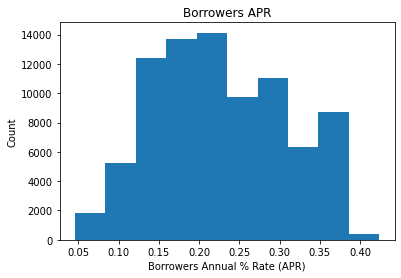

In [34]:
# A simple histogram plot of the variable BorrowerAPR
plt.hist(data=loan_df, x='BorrowerAPR');
plt.xlabel('Borrowers Annual % Rate (APR)')
plt.ylabel('Count')
plt.title('Borrowers APR')

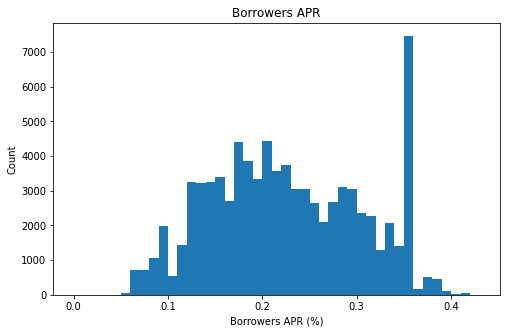

In [35]:
#further investigation on smaller bin size
binsize = 0.01
bins = np.arange(0, loan_df['BorrowerAPR'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrowers APR (%)')
plt.ylabel('Count')
plt.title('Borrowers APR')
plt.show()

### Observation

The distribion is unimodal with the peak values around 0.35%

### Question 2

I am looking at the distribution of my second variable of interest: **LoanOriginalAmount**

### Visualization

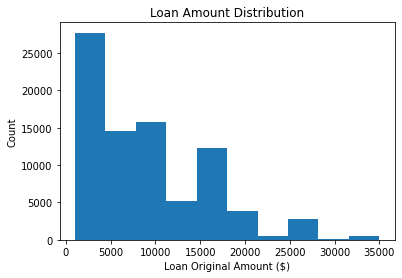

In [36]:
# A simple histogram plot of the variable LoanOriginalAmount
plt.hist(data=loan_df, x='LoanOriginalAmount');
plt.xlabel('Loan Original Amount ($)');
plt.ylabel('Count');
plt.title('Loan Amount Distribution');

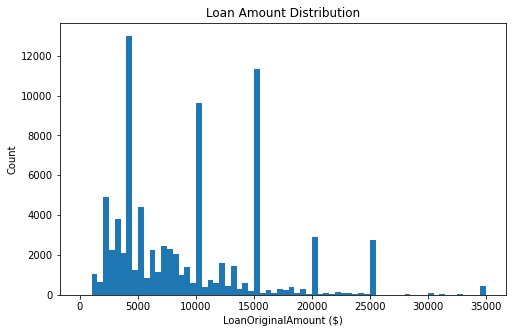

In [37]:
#further investigating
binsize = 500
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('Count')
plt.title('Loan Amount Distribution');
plt.show()

### Obsesrvation

The distribution is TriModal having peak values around 5k,10k,15k ($). This clearly explains that most loan collected were around the ranges of the peak value

### Question 3 

What is the range of income of most loan collector?

### Visualization

<Figure size 576x360 with 0 Axes>

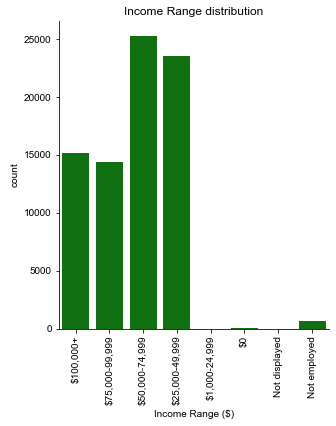

In [38]:
#A simple count plot of variable:IncomeRange
plt.figure(figsize=[8, 5])
category_order=['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1,000-24,999',
                '$0','Not displayed','Not employed']
sb.catplot(data=loan_df, x='IncomeRange',kind='count',order=category_order,color='green')
sb.set_style('darkgrid')
plt.title('Income Range distribution')
plt.xlabel('Income Range ($)');
plt.xticks(rotation=90);

### Observation

Most loan collector earn about 50,000 - 74,999 ($).  It could also been deduce that high income earners(100k+) also collect loan

### Question 4

What is the length of most loan?

### Visualization

Text(0, 0.5, 'Count')

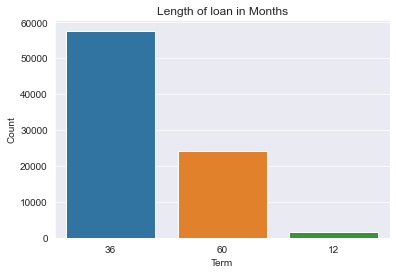

In [39]:
# A countplot showing length of loan
category_order=[36,60,12]
sb.countplot(data=loan_df, x='Term',order=category_order)
sb.set_style('dark')
plt.title('Length of loan in Months')
plt.xlabel('Term')
plt.ylabel('Count')

### Observation

Most loan span across 36months (3 years). Which implies most loan collector payback across the span of 3 years

### Question 5

Plot the distribution of three ordinal variable's

### Visualization

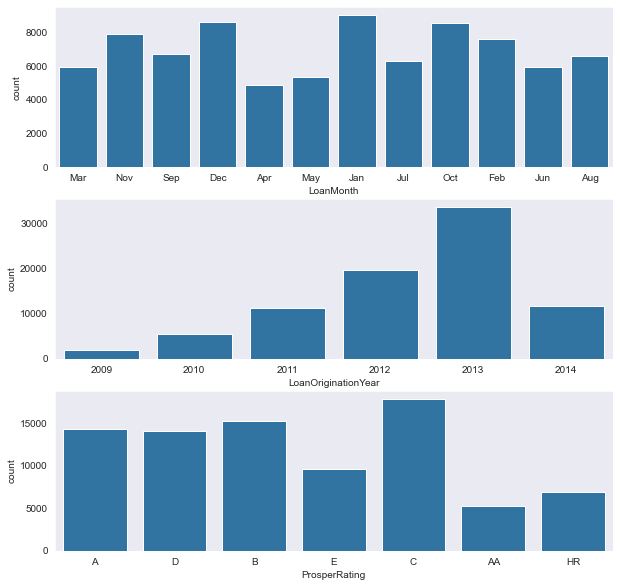

In [40]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [10,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'LoanMonth', color = default_color, ax = ax[0])
sb.countplot(data = loan_df, x = 'LoanOriginationYear', color = default_color, ax = ax[1])
sb.countplot(data = loan_df, x = 'ProsperRating', color = default_color, ax = ax[2])

plt.show()

### Observation 

Most loans were collected in January (beginning of the month) and in the year 2013. 
Also the prosper rating C has the highest listing

### Question 6

Plot the distribution of the norminal variable's and state your observation

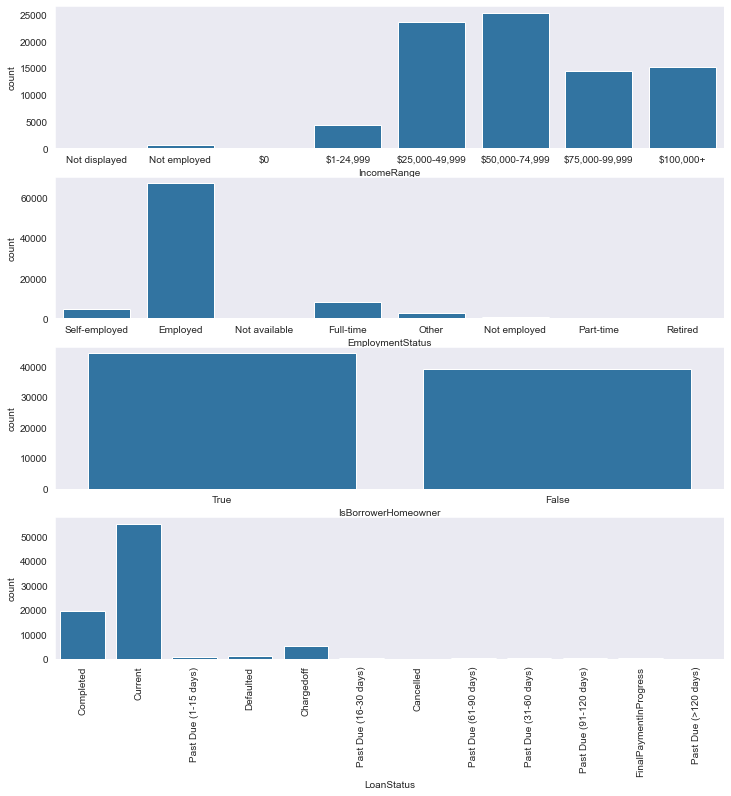

In [41]:
# let's plot all three together to get an idea of each nominal variable's distribution
fig, ax = plt.subplots(nrows=4, figsize = [12,12])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'IncomeRange', color = default_color, ax = ax[0])
sb.countplot(data = loan_df, x = 'EmploymentStatus', color = default_color, ax = ax[1])
sb.countplot(data = loan_df, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[2])
sb.countplot(data = loan_df, x = 'LoanStatus', color = default_color, ax = ax[3])
plt.xticks(rotation=90)

plt.show()

### Observation

Most borrowers are averagely earned people who are home owners and have a current status loan yet to be completed.It would make logical sense for loans to be issued only to those that have a means of paying back.

### Question 7

Which states has the highest amount of borrowers?

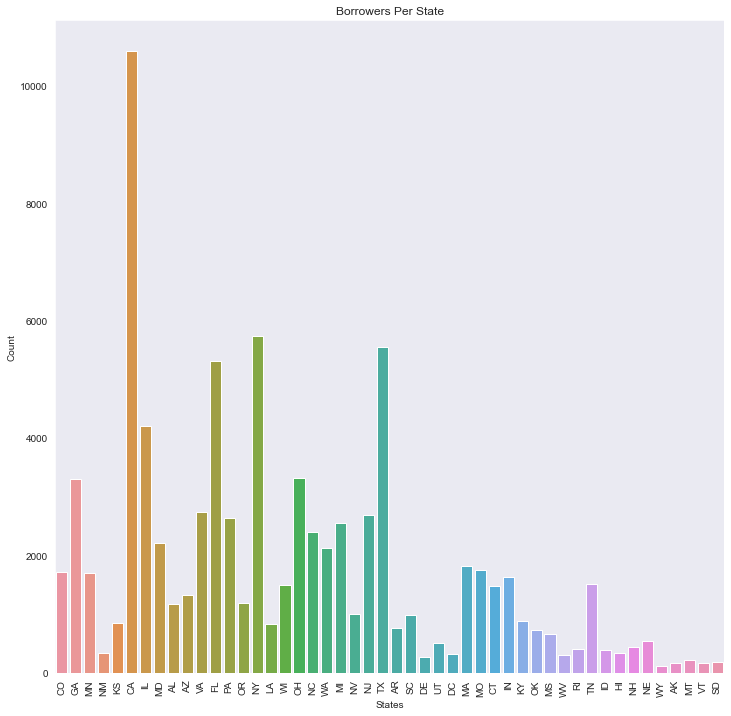

In [42]:

plt.figure(figsize=[12, 12])
sb.countplot(data=loan_df, x='BorrowerState')
sb.set_style('dark')
plt.title('Borrowers Per State')
plt.xlabel('States')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Observation

CA has the highest number of borrowers followed by NY,TX. From my research these three states are the most populous in USA

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The BorrowerAPR distribution is multimodal having a peak about 0.4 percent. Also, the LoanOriginalAmount distribution is TriModal having peak values around 5k,10k,15k ($)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most borrowers are employed people who earn averagely (50,000 - 74,999)

## Bivariate Exploration

I will be investigating relationships between pairs of variables in the data. I want to look at the pairwise correlations present between features in the data.

In [43]:
numeric_vars = ['Term','BorrowerAPR','BorrowerRate','ListingCategory','EmploymentStatusDuration','LoanOriginalAmount',
                'StatedMonthlyIncome']
categoric_vars = ['LoanStatus','ProsperRating','EmploymentStatus', 'IsBorrowerHomeowner','IncomeRange','LoanMonth']

### Visualization

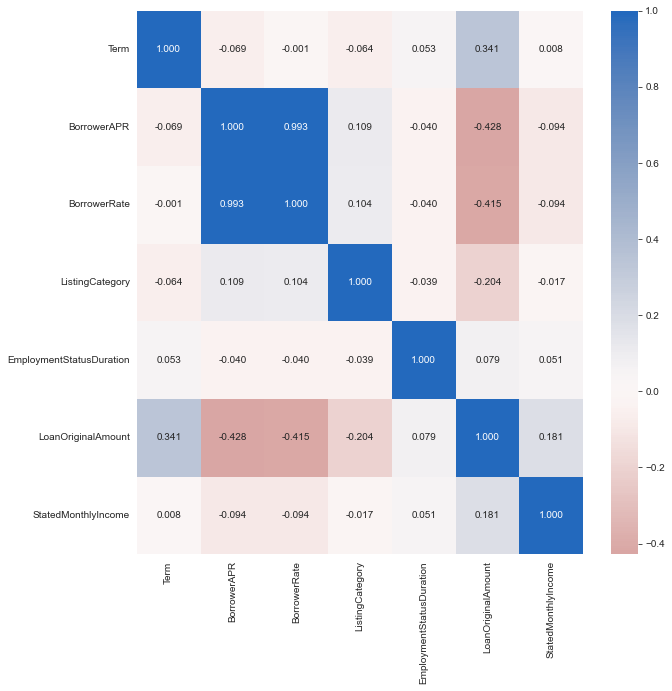

In [44]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(loan_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Observation

From the correlation plot:
- There is a strong positive correlation between BorrowerAPR and BorrowerRate which 0.993.
- There's a weak positive correlation between Term and Loan Original Amount which is 0.341

### Question

Sample 1000 loan data to understand correletion between features

loan_df.shape= (83507, 18)
loan_samp.shape= (1000, 18)


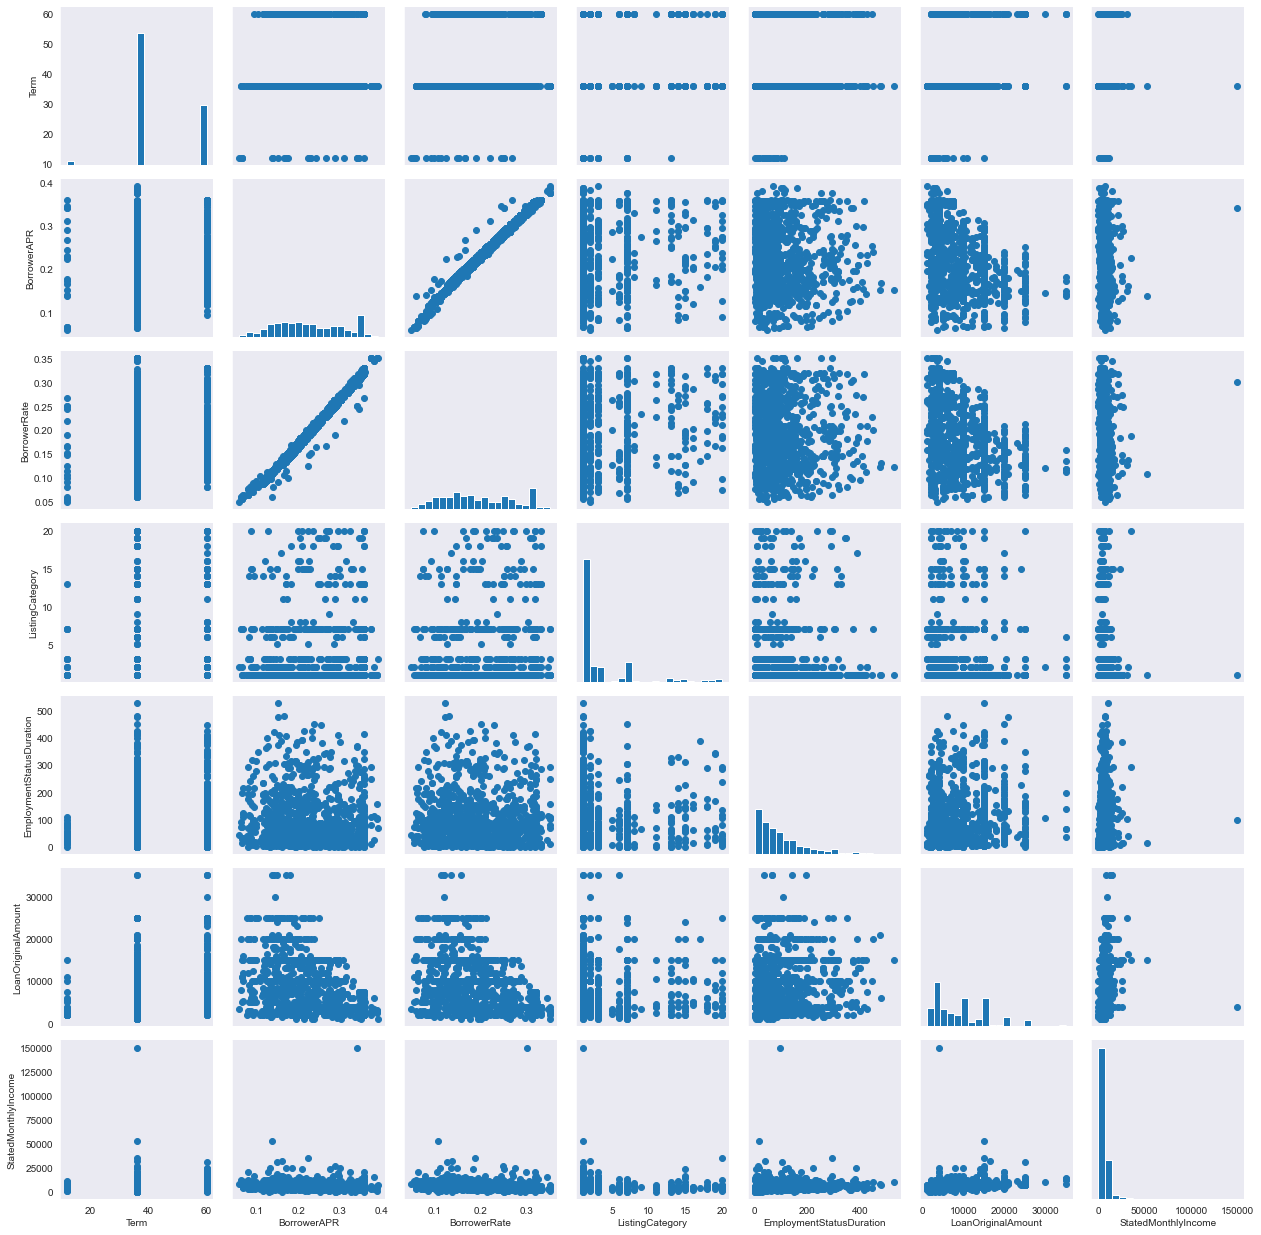

In [45]:
# plot matrix so that plots are clearer and they render faster
print("loan_df.shape=",loan_df.shape)
loan_samp = loan_df.sample(n=1000, replace = False)
print("loan_samp.shape=",loan_samp.shape)

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)

### Observation

From the correlation plot:

There is a strong positive correlation between BorrowerAPR and BorrowerRate. There is  no correlation between Term.
There is no correlation between StatedMonthlyIncome and: BorrowerAPR, EmploymentStatusDuration which further explains that no 
apparent relationship between two variables
LoanOriginalAmount also has no relationship with any of the predictor variables 


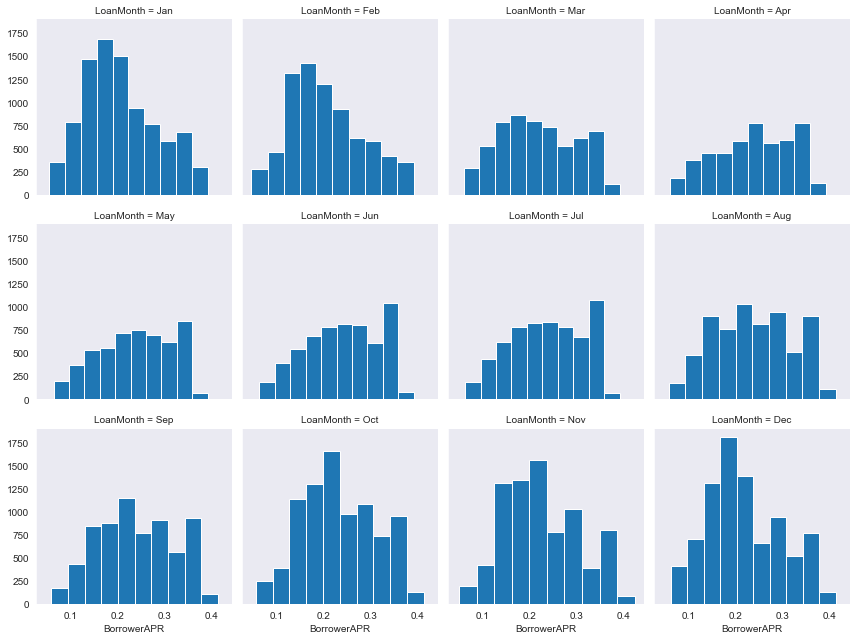

In [46]:
y=sb.FacetGrid(data=loan_df,col_wrap=4, col='LoanMonth',
               col_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
y.map(plt.hist,'BorrowerAPR')

### Observation

There is a positive strong correlation between BorrowerAPR and BorrowerRate and it's not surprising because the higher 
the %APR the higher the interest rate

### Question 8

What's is the BorrowerAPR distribution Per Month?

### Visualization

Text(0.5, 1.0, 'Borrower APR distribution by Month')

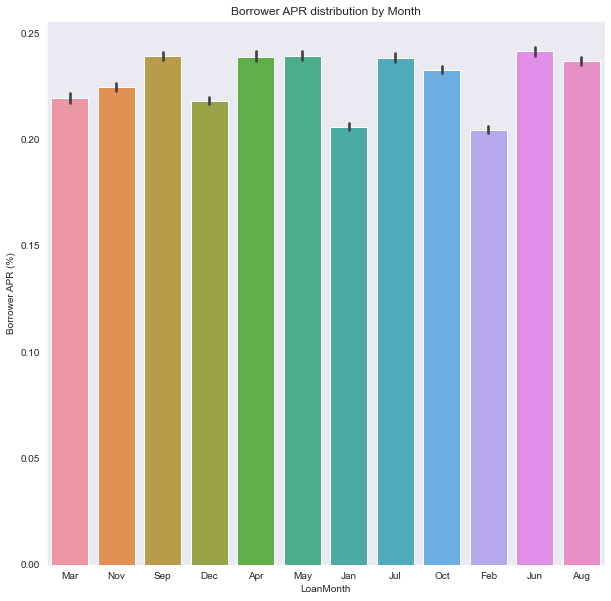

In [47]:
# A bar plot to show the average borrower Apr distribution by month.
plt.figure(figsize = [10, 10])
sb.barplot(data=loan_df,x='LoanMonth',y='BorrowerAPR')
sb.set_style('dark')
plt.ylabel('Borrower APR (%)');
plt.title('Borrower APR distribution by Month')

### Observation

The APR distribution by month showed that month with lower APR saw larger amount of individuals collecting loans

### Question 9

What's is the BorrowerAPR distribution Per Year?

### Visualization

Text(0.5, 1.0, 'Borrower APR distribution by Year')

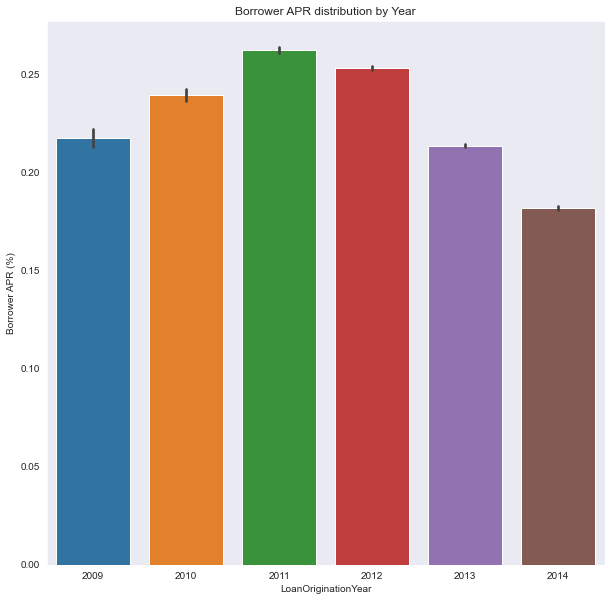

In [48]:
# A bar plot to show the average borrower Apr distribution by Year.
plt.figure(figsize = [10, 10])
sb.barplot(data=loan_df,x='LoanOriginationYear',y='BorrowerAPR')
plt.ylabel('Borrower APR (%)');
plt.title('Borrower APR distribution by Year')

### Observation

The distributin shows that 2011 has the highest % of APR which is 0.25% and 2014 has the least APR which is about 0.17%. There is a gradual fall process from 2012 to 2014

### Question 10

What is the risk associated with LoanAmount?

### Visualization

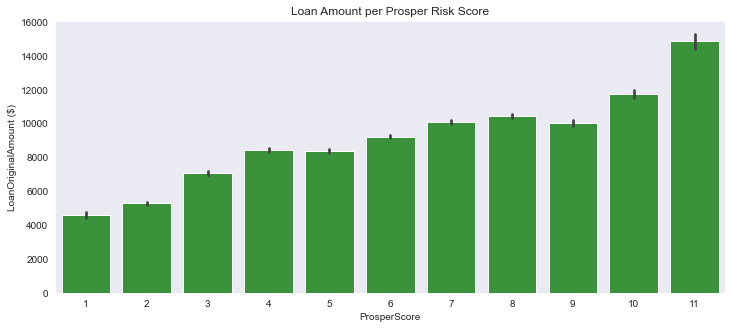

In [49]:
plt.figure(figsize=[12,5])
color = sb.color_palette()[2]
sb.barplot(data=loan_df, x='ProsperScore', y='LoanOriginalAmount', color=color)
plt.ylabel('LoanOriginalAmount ($)');
plt.title('Loan Amount per Prosper Risk Score');

### Observation

The higher the amount of loan, the lower the risk score attached. In this graph, it can be deduce that 14,000($) which is 
the highest has lowest risk score because the lower the risk of a borrower, the higher the chance of getting high amount of loan

### Question

How does BorrowerAPR and LoanOriginalAmount correlate with the categorical variables?

### Visualization

C:\python 3.1\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


(array([0, 1]), [Text(0, 0, 'True'), Text(1, 0, 'False')])

<Figure size 864x1296 with 0 Axes>

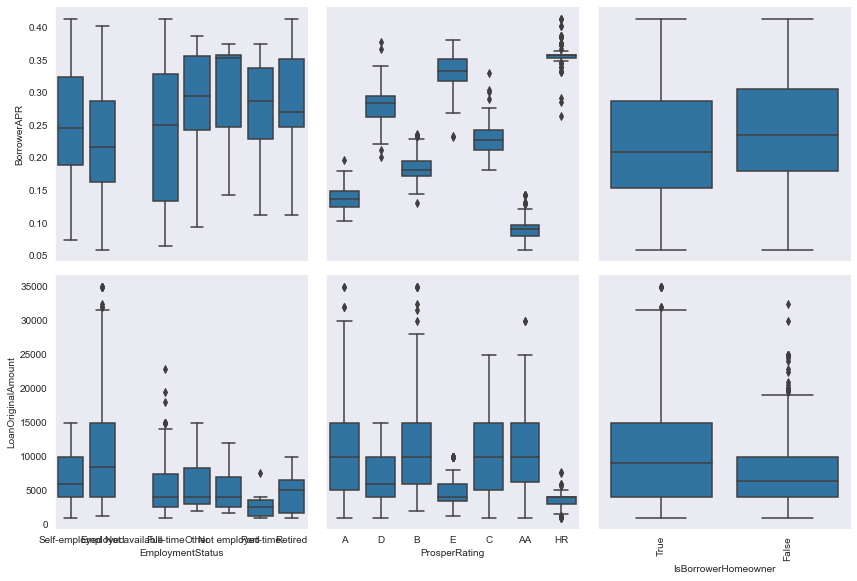

In [50]:
loan_samp = loan_df.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [12, 18])
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = ['EmploymentStatus',
    'ProsperRating','IsBorrowerHomeowner'],size=4,height = 3, aspect = 1.0)
g.map(boxgrid)
plt.xticks(rotation=90)


### Observation

Borrowers most likely get access to higher loan amount if they are employed, own a home and have a high ProsperScore(low risk)
because they can be able to pay back loan without defaulting.
Borrowers with low BorrowerAPR


### Question

What's the correlation between ProsperScore, Term, IsBorrowerHomeowner and ProsperRating(four categorical features)?

### Visualization

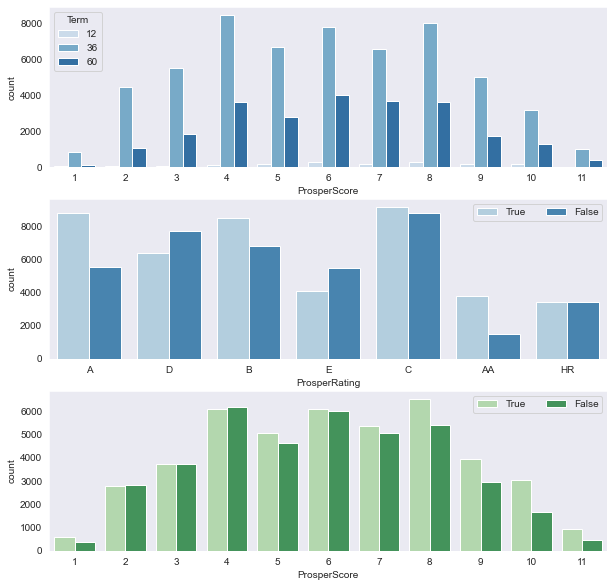

In [51]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 10])

# subplot 1: LoanStatus vs Term
plt.subplot(3, 1, 1)
sb.countplot(data = loan_df, x = 'ProsperScore', hue = 'Term', palette = 'Blues')

# subplot 2: ProsperRating vs. IsBorrowerHomeOwner
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_df, x = 'ProsperRating', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_df, x = 'ProsperScore', hue = 'IsBorrowerHomeowner', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### Observation

Home owner has no impact on loan, Prosperscore and ProsperRating

### Question 

How does ProsperScore and ProsperRating affect BorrowerApR

<AxesSubplot:xlabel='ProsperRating', ylabel='BorrowerAPR'>

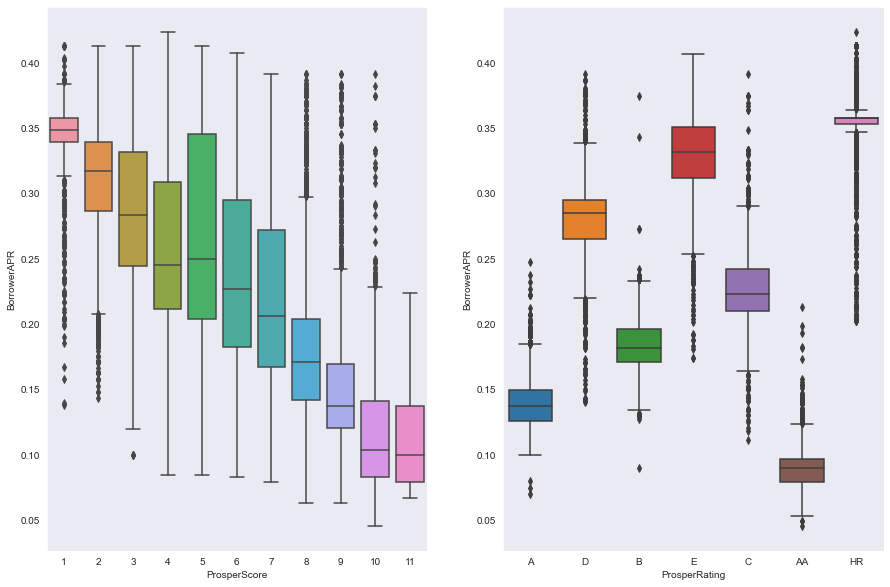

In [52]:
# ploting fig size
plt.figure(figsize=[15,10])
#position of 1st plot
plt.subplot(1,2,1)
# a box plot to show ProsperScore distribution
sb.boxplot(data=loan_df, x='ProsperScore', y='BorrowerAPR')
#position of the 2nd plot
plt.subplot(1,2,2)
#A box plot to show ProsperRating distribution 
sb.boxplot(data=loan_df, x='ProsperRating', y='BorrowerAPR')

### Observation

The observation from the plots shows that the lower the BorrowerAPR, the higher the ratings.

### Question 14

What's is the top 3 Occupation with the highest loan amount?

### Visualization

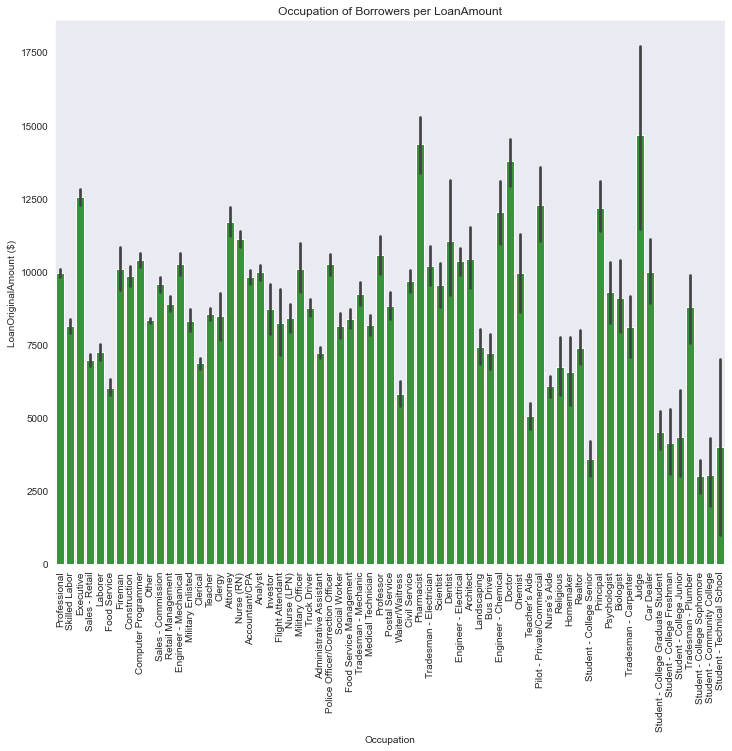

In [53]:
plt.figure(figsize=[12,10])
color = sb.color_palette()[2]
sb.barplot(data=loan_df, x='Occupation', y='LoanOriginalAmount', color=color)
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Occupation')
plt.title('Occupation of Borrowers per LoanAmount')
plt.xticks(rotation=90)
plt.show()

### Observation

Judge, Doctor, Pharmacist are thr top 3 occupation with high loan amount.I can also deduduce the most top professions borrow
the highest amount of loan because they can afford to pay back due to the high income earned

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
I noticed that the lower the BorrowerAPR, the higher the ratings.Borrowers most likely get access to higher loan amount if they are employed, own a home and have a high ProsperScore(low risk) because they can be able to pay back loan without defaulting.
Also,borrowers in top 3 noble occupation collect the highest amount of loan

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It is surprising that here is a weak positive correlation between Term and Loan Original Amount 

## Multivariate Exploration

I want to explore more on my main features of interest to see if any other postive  relatrionship with other variable 

### Visualization

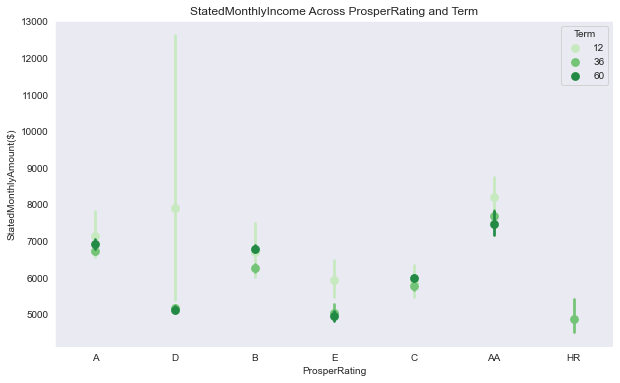

In [54]:
plt.figure(figsize = [10,6])
sb.pointplot(data = loan_df, x = 'ProsperRating', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Greens', linestyles = '')
plt.title('StatedMonthlyIncome Across ProsperRating and Term')
plt.ylabel('StatedMonthlyAmount($)')
plt.xlabel('ProsperRating')
plt.show()

### Visualization

<Figure size 720x432 with 0 Axes>

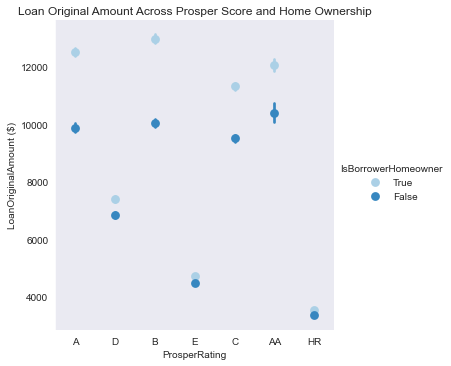

In [55]:
plt.figure(figsize = [10,6])
sb.catplot(data = loan_df, x = 'ProsperRating', y = 'LoanOriginalAmount',kind='point', hue = 'IsBorrowerHomeowner',
           palette = 'Blues',join=False)
plt.title('Loan Original Amount Across Prosper Score and Home Ownership')
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('ProsperRating')
plt.show()

### Observation

It shows that is a 95% confidence interval between low risk rating (AA) and the loan amount, which deduce that borrowers who has a home has low risk rating and access to larger amount of loan

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It shows that is a 95% confidence interval between prosperRating and Loan Amount which deduce that borrowers who has a home and  has low risk rating get larger loan which should further prove they would most likely not default which it's payback period.

Loan term is an important factor in granting loans.The larger the Loan Amounts, the longer the term which further explain there is a directly proportional relationship between Term and Loan Amount. Also, the Longer the Loan Term, the better the risk score(Prosper Score) which further prove the larger the Loan Amount to be granted out. 

### Were there any interesting or surprising interactions between features?

BorrowerAPR and BorrowerRate have a strong correlation 